# Lion`s Den ING Risk Modelling Challenge 2024
## Preliminary Task

> Imagine that you are a credit risk model developer working for a large bank. Recently, it was noticed that the predictive power of current tool, used to estimate the probability of default for customers applying for an Instalment Loan product, has significantly decreased. Your direct manager asked you to create a model which will replace the current one. Your work will be vital to the company since retail term loan portfolio is one of the largest in the institution. Your colleague, Barbara, has already prepared data for you.
(...)

> In this task, your aim is to build* a **logistic regression** and a challenger model that will allow you to precisely quantify probability of default of bank’s clients, namely retail customers applying for term loans, and to present modelling and prediction results.
### Tasks:
- build a logistic regression in Python or Julia
- build a challenger model that will quantify the __probability__ of default of bank's client
- present modelling and prediction results

# 1.1 Describe the dataset
Available datasets:
- development_sample.csv - train data (50000 records, 36 features), included targets. For model training purposes.
- testing_sample.csv - test data (5000 records, 36 features), also included targets. Just for validation purposes.

## Variables:
- id	Application ID (NUMERICAL DISCRETE)
- customer_id	Customer ID (NUMERICAL DISCRETE)
- application_date	Application date (DATETIME) 
- **target	"Default indicator: 1. loan went into default, 0. facility performing *Missing for rejected applications*** (BINARY)
- application_status	Application status (Approved/Rejected) (BINARY)
- Var1 — Number of applicants (NUMERICAL DISCRETE)
- Var2 — Loan purpose: (CATEGORICAL NOMINAL)
    - 1 - Car Loan
    - 2	- House Renovation
    - 3	- Short Cash
- Var3 — Distribution channel: (CATEGORICAL NOMINAL)
    - 1 - Direct
    - 2 - Broker
    - 3 - Online
- Var4 — Application amount (NUMERICAL)
- Var5 — Credit duration (months) (NUMERICAL)
- Var6 — Payment frequency: (NUMERICAL DISCRETE)
    - 1	- monthly
    - 3	- quarterly
    - 6	- bi-yearly
- Var7 — Installment amount (NUMERICAL CONTINUOUS)
- Var8 — Value of the goods (car) (NUMERICAL CONTINUOUS)
- Var9 — Application data: income of main applicant (NUMERICAL CONTINUOUS)
- Var10 — Application data: income of second applicant (NUMERICAL CONTINUOUS)
- Var11 — Application data: profession of main applicant (CATEGORICAL NOMINAL): 
    - 1	- Pensioneer
    - 2	- Government
    - 3	- Military
    - 4	- Self Employed
    - 5	- Employee
    - 6	- Business Owner
    - 7	- Unemployed
- Var12 — Application data: profession of second applicant (CATEGORICAL NOMINAL): 
    - 1	- Pensioneer
    - 2	- Government
    - 3	- Military
    - 4	- Self Employed
    - 5	- Employee
    - 6	- Business Owner
    - 7	- Unemployed
- Var13 — Application data: employment date (main applicant) (DATE)
- Var14 — Application data: marital status of main applicant (CATEGORICAL NOMINAL):
    - 0	- Single
    - 1	- Married
    - 2	- Informal relationship
    - 3	- Divorced
    - 4 - Widowed
- Var15 — Application data: number of children of main applicant (NUMERICAL DISCRETE)
- Var16 — Application data: number of dependences of main applicant (NUMERICAL DISCRETE)
- Var17 — Spendings estimation (NUMERICAL CONTINUOUS)
- Var18 — Property ownership for property renovation (BINARY)
- Var19 — Clasification of the vehicle (Car, Motorbike) (BINARY)
- Var20 — Number of requests during the last 3 months (External data) (NUMERICAL DISCRETE)
- Var21 — Number of requests during the last 6 months (External data) (NUMERICAL DISCRETE)
- Var22 — Number of requests during the last 9 months (External data) (NUMERICAL DISCRETE)
- Var23 — Number of requests during the last 12 months (External data) (NUMERICAL DISCRETE)
- Var24 — Limit on credit card (NUMERICAL DISCRETE)
- Var25 — Amount on current account (NUMERICAL CONTINOUS)
- Var26 — Amount on savings account (NUMERICAL CONTINOUS)
- Var27 — Arrear (zaległość) in last 3 months (indicator) (BINARY)
- Var28 — Arrear (zaległość) in last 12 months (indicator) (BINARY)
- Var29 — Credit bureau score (Exterval data) (NUMERICAL DISCRETE)
- Var30 — Average income (Exterval data) (NUMERICAL DISCRETE)


In [1]:
import warnings
warnings.filterwarnings('ignore')

### Import of datasets:

In [2]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('https://files.challengerocket.com/files/lions-den-ing-2024/development_sample.csv')
test_data = pd.read_csv('https://files.challengerocket.com/files/lions-den-ing-2024/testing_sample.csv')


### Splitting variables into subtypes

In [3]:
discrete_variables = ['ID', 'customer_id', 'Var1', 'Var15', 'Var16', 'Var20', 'Var21', 'Var22',
                      	'Var23', 'Var29', 'Var4', 'Var5', 'Var9', 'Var24', 'Var30', 'Var6'
]

continuous_variables = [
    'Var7', 'Var8', 'Var10', 
    'Var17', 'Var25', 'Var26', '_r_'
]

binary_variables = [
    'target', 'Application_status', 'Var18', 
    'Var19', 'Var27', 'Var28'
]

categorical_nominal_variables = [
    'Var2', 'Var3', 'Var11', 'Var12', 'Var14'
]


datetime_variables = [
    'application_date', 'Var13'
]


Are there any features missing?

In [4]:
from itertools import chain
assigned_vars = pd.Index(chain.from_iterable([discrete_variables, continuous_variables, 
binary_variables, categorical_nominal_variables, datetime_variables]))
print("Variables not assigned yet:", train_data.columns.difference(assigned_vars) if train_data.columns.difference(assigned_vars).shape[0] else "ALL ASSIGNED")

Variables not assigned yet: ALL ASSIGNED


But those are generic Var names and we will be operating on full variables names for greater readibility, so now we will prepare a mapping.

In [5]:
train_data.columns[5]
#plik z opisem zmiennych
names_xlsx = pd.read_excel('./variables_description.xlsx')
#Słownik zmian nazw kolumn
names = {f"{names_xlsx['Column'][i]}":f"{names_xlsx['Description'][i]}" for i in range(5, len(names_xlsx))}

Now we will transform our subtype lists for compatibility's sake

In [6]:
subtypes_list = [discrete_variables, continuous_variables, 
binary_variables, categorical_nominal_variables, datetime_variables]

for subtype_idx in range(len(subtypes_list)):
    for variable_idx in range(len(subtypes_list[subtype_idx])):
        if subtypes_list[subtype_idx][variable_idx] in names.keys():
            subtypes_list[subtype_idx][variable_idx] = names[subtypes_list[subtype_idx][variable_idx]]

Also full variable names were mapped to datasets.

In [7]:
#Rename datasetów
train_data = train_data.rename(columns=names)
test_data = test_data.rename(columns = names)

Discrete variables:

In [8]:
train_data[discrete_variables]

,ID,customer_id,Number of applicants,Application data: number of children of main applicant,Application data: number of dependences of main applicant,Number of requests during the last 3 months (External data),Number of requests during the last 6 months (External data),Number of requests during the last 9 months (External data),Number of requests during the last 12 months (External data),Credit bureau score (Exterval data),Application amount,Credit duration (months),Application data: income of main applicant,Limit on credit card,Average income (Exterval data),Payment frequency
0,11034977,32537148,1,0,0,1,1,1,1,0,7800,99,5640,0,3899,1
1,11034978,32761663,1,4,4,0,0,0,0,0,11100,78,3000,15000,3899,1
2,11034979,32701063,2,0,0,1,2,2,2,10,2400,15,6240,0,3899,1
3,11034980,32386786,3,0,0,0,0,0,0,10,11800,30,4560,0,3899,6
4,11034981,32692110,1,2,4,0,0,2,2,20,10200,72,5160,0,3899,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,11084972,32554904,2,0,1,1,2,2,2,0,49200,111,6240,0,12832,1
49996,11084973,32884069,1,1,1,2,2,3,4,0,25600,30,23640,0,12832,1
49997,11084974,32433438,1,0,0,0,0,0,0,0,46700,18,24840,0,12832,1
49998,11084975,32877592,1,1,1,2,3,3,3,10,44300,162,20400,102000,12832,3


Continous variables:

In [9]:
train_data[continuous_variables]


,Installment amount,Value of the goods (car),Application data: income of second applicant,Spendings estimation,Amount on current account,Amount on savings account,_r_
0,108.73,NaN,NaN,3272.31,6768.42,0.00,0.267045
1,195.99,11200.0,NaN,1387.35,5937.66,3870.60,0.533040
2,248.34,NaN,4300.0,4703.28,5647.77,1463.08,0.861555
3,3538.68,12400.0,2500.0,2508.70,3594.90,21563.78,0.506451
4,580.26,NaN,NaN,2564.96,9908.45,0.00,0.210913
...,...,...,...,...,...,...,...
49995,621.69,52600.0,11900.0,6829.92,NaN,NaN,0.783954
49996,1215.29,NaN,NaN,11465.61,NaN,NaN,0.172590
49997,3963.94,79000.0,NaN,9876.73,9288.87,255018.31,0.060722
49998,1179.81,69400.0,NaN,9857.96,NaN,NaN,0.845866


Nominal variables:

In [10]:
train_data[categorical_nominal_variables]

,Loan purpose,Distribution channel,Application data: profession of main applicant,Application data: profession of second applicant,Application data: marital status of main applicant
0,2.0,1,5,NaN,2
1,1.0,2,2,NaN,4
2,3.0,1,5,5.0,1
3,1.0,2,6,5.0,1
4,2.0,1,5,NaN,0
...,...,...,...,...,...
49995,1.0,1,4,5.0,0
49996,2.0,1,5,NaN,0
49997,1.0,1,5,NaN,0
49998,1.0,Direct,4,NaN,0


Datetime variables:

In [11]:
train_data[datetime_variables]


,application_date,Application data: employment date (main applicant)
0,01Feb2010 0:00:00,26Nov2004
1,01Feb2010 0:00:00,16Sep1996
2,01Feb2010 0:00:00,06May1989
3,01Feb2010 0:00:00,06Dec1987
4,02Feb2010 0:00:00,18May1989
...,...,...
49995,31Dec2020 0:00:00,28Mar2008
49996,31Dec2020 0:00:00,10Nov1998
49997,31Dec2020 0:00:00,28Oct2006
49998,31Dec2020 0:00:00,31Oct2016


From this we can calculate how much time passed since employment

### How many NaNs?

In [12]:
percent_of_nans = (np.sum(train_data.isna(), axis=0)/train_data.shape[0])
percent_of_nans[percent_of_nans > 0].sort_values(ascending=False)

Application data: income of second applicant        0.75076
Application data: profession of second applicant    0.75076
Property ownership for property renovation          0.74832
Value of the goods (car)                            0.58346
Clasification of the vehicle (Car, Motorbike)       0.58346
Amount on savings account                           0.39766
target                                              0.26564
Amount on current account                           0.20176
Loan purpose                                        0.02806
Distribution channel                                0.02806
Spendings estimation                                0.00080
dtype: float64

There are a lot of NaNs in:
1. Application data: income of second applicant - income of second applicant, NaN because there might be lack of second applicant
2. Application data: profession of second applicant - profesion of second applicant, NaN because there migth be lack fo second applicant
Equality of those NaN percentages suggest that it indicates lack of second applicant.
3. Property ownership for property renovation - it is about property renovation, so it is only when property renovation is a subject of loan, otherwise NaN
4. Value of the goods (car) - value of car/motorbike, so if there is NaN there is no car.
5. Clasification of the vehicle (Car, Motorbike) - 1 if car, 0 if motorbike. Also NaN if Var18 NaN
6. Amount on savings account   - amount of savings on saving account, lack means lack of saving account *information can be extracted: people who own savings account might be more safe with money, so less prone to default*
7. target - nan if rejected
8. Amount on current account - can't interpret it... maybe lack of account in general?
9. Loan purpose - purpose of loan, might be human error
10. Distribution channel - distribution channel, might be also human error
11. Spendings estimation - spending estimation, might be lack of such

What to do with each?

1. Application data: income of second applicant - set 0, because there is no second aplicant, so no income
2. Application data: profession of second applicant - create new value: 0, it will mean that there is not second applicant, in further one hot encoding it will be clearly seen
3. Property ownership for property renovation - add third variant of variable (ex. 2) if loan is not about property renovation. It won't matter since we will OneHotEncode it.
4. Value of the goods (car) - set 0 if NaN, there is no car or motorbike so the value is 0. 
5. Clasification of the vehicle (Car, Motorbike) - same as with Var18 probably
6. Amount on savings account - set 0 if NaN but also add variable 'hasSavingsAccount' that takes 0 if it is NaN and 1 otherwise. It will discriminate amongst people that opened this account but don't have savings and people who don't bother
7. target - don't need to do anything. Might be worth looking into: how many of those would get loan according to our model and try to see if in this subsample, distribution is similar. Then we would know if those applicants were really worse than the accepted population(?) Just guessing
8. Amount on current account - simple impute by dominant / drop 
9. Loan purpose - simple impute by dominant / drop
10. Distribution channel - simple impute by dominant /drop
11. Spendings estimation - drop. Giving mean might be tempting, but there are few observations that are missing and we don't want to mess data for the model.

## Analyzing the features that are not missing
## Numerical

In [13]:
features_wo_nulls = train_data.loc[:, percent_of_nans == 0].columns

Numerical discrete

In [14]:
train_data[features_wo_nulls.intersection(discrete_variables)].describe()

,ID,customer_id,Number of applicants,Application amount,Credit duration (months),Payment frequency,Application data: income of main applicant,Application data: number of children of main applicant,Application data: number of dependences of main applicant,Number of requests during the last 3 months (External data),Number of requests during the last 6 months (External data),Number of requests during the last 9 months (External data),Number of requests during the last 12 months (External data),Limit on credit card,Credit bureau score (Exterval data),Average income (Exterval data)
count,5.000000e+04,5.000000e+04,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000
mean,1.105998e+07,3.262894e+07,1.33786,17123.466000,42.141900,1.54724,10138.046400,0.764300,1.023900,0.552060,0.995460,1.355780,1.714940,7693.896000,6.78040,8182.152860
std,1.443390e+04,1.537429e+05,0.66462,12217.178461,45.378778,1.23719,5311.906294,0.982652,1.174647,0.970128,1.340983,1.591129,1.814075,20984.098355,10.83386,3190.983287
min,1.103498e+07,3.236142e+07,1.00000,700.000000,6.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3899.000000
25%,1.104748e+07,3.249680e+07,1.00000,6900.000000,15.000000,1.00000,6000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5035.000000
50%,1.105998e+07,3.263026e+07,1.00000,14100.000000,27.000000,1.00000,9000.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,8569.000000
75%,1.107248e+07,3.276254e+07,1.00000,24800.000000,48.000000,1.00000,13320.000000,1.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,10.00000,11839.000000
max,1.108498e+07,3.289438e+07,4.00000,63700.000000,312.000000,6.00000,43320.000000,5.000000,8.000000,15.000000,22.000000,23.000000,26.000000,190800.000000,250.00000,12832.000000


**Number of applicants** - on average there were 1.33 applicant with standard deviation of 0.664 around the mean. Minimally there were 1 (as expected applicant) but the loan with the most applicants had 4 of them. Vast majority (which is indicated by 1st quartile) were loans with 1 applicant.

**Application amount** - on average clients were applying for a loan of 17123.466$ (dont know the currency so assume \$), with standard deviation of 12217.17\$. 25% of loans were equal or lower than 6900\$ with minimum reaching 700\$. 25\% of loans were applied for 24800\$ with maximum loan reaching 63700\$. The lower 50% of loan values were lower than 14100\$, and consequently the upper 50% were higher. It means that there was not much difference between median and mean suggesting slight left-side assymetry in distribution of application amounts.

**Credit duration (months)** - on average credit lasted 42.142 months with standard deviation of 45.378 (which is greater than mean, so the variable is strongly dispersed). The shortest observed loan lasted half a year, and the longest lasted 51 years. But the 50% of loans were shorter than 27 months (and consequently the other 50% were longer than that).

**Income of main applicant** - on average main applicant earned 10138\$ with standard deviation of 5311.9\$. It indicates that the variable is not that strongly dispersed, with standard deviation being 52% of mean. Also the 50\% of incomes of main applicants were below or above 9000\$ which is very close to the mean suggesting some symmetry in the distribution. The lowest income was 0\$ with highest reaching 43320\$. 

**Number of children of main applicant** - on average main applicant had 0.76 children with standard deviation of 0.98 (also strongly dispersed). But value of 1st quartile suggests that 75% of applicants had only one child, with maximum amount of children per applicant reaching 5 children.

**Number of dependencies of main applicant** - on average main applicant had 1.02 dependencies with standard deviation of 1.17 (strong dispersion). The lowest was 0 dependencies and maximum was 8. The upper 25% of dataset had 2 or more dependencies.

**Number of requests during the last 3 months** - maximally applicant had 15 loan requests in last 3 months with minimally 0. The 50% of applicant had more or less than 1 application in last 3 months.

**Number of requests during the last 6 months** - maximally applicant had 22 loan requests in last 6 months with minimally 0. The 50% of applicant had more or less than 1 application in last 6 months.

**Number of requests during the last 9 months** - maximally applicant had 23 loan requests in last 9 months with minimally 0. The 50% of applicant had more or less than 1 application in last 9 months.

**Number of requests during the last 12 months** - maximally applicant had 26 loan requests in last 12 months with minimally 0. The 50% of applicant had more or less than 1 application in last 12 months. 

**Limit on credit card** - mean limit on credit card is 7693\$ with standard deviation of 20984\$ (so a big dispersion). But the vast majority (at least 75%) had no limit on card, with maximum limit on credit card 190800\$. 

**Credit bureau score** - on average credit bureau was 6.78 with standard deviation 10.83, but the 75% of dataset had credit bureau score lower or equal to 10, with maximal score of 250.

**Average income** - average income of applicant (not main) is equal to 8128.15\$ with standard deviation of 3190\$. 50\% of incomes is higher or lower than 8569\$, with lowest income of 3899\$ and maximum of 12832\$.

Numerical continuous

In [15]:
train_data[features_wo_nulls.intersection(continuous_variables)].describe()


,Installment amount,_r_
count,50000.000000,5.000000e+04
mean,1330.747722,4.980869e-01
std,1619.370201,2.880834e-01
min,53.980000,3.953460e-07
25%,470.112500,2.481838e-01
50%,842.060000,4.966425e-01
75%,1548.790000,7.468285e-01
max,27075.540000,9.999984e-01


**Installment amount** - expected value of installment amount is 1330.75\$ with standard deviation of 1619.37\$. With minimal installment of 53.98\$, and maximum of 27075.54\$. 50\% of installments were below 842.06\$ and other half above it.

### Categorical

Nominal (here only the mode and maybe the distribution shape is important):

In [16]:
train_data[features_wo_nulls.intersection(categorical_nominal_variables)].mode()


,Application data: profession of main applicant,Application data: marital status of main applicant
0,5,0


**Application data: profession of main applicant** - the most common profession of main applicant was Employee

**Application data: martial status of main applicant** - the most common martial status amongst main aplicants was 0.

<AxesSubplot:title={'center':'Distribution of professions in applicants'}, xlabel='Application data: profession of main applicant'>

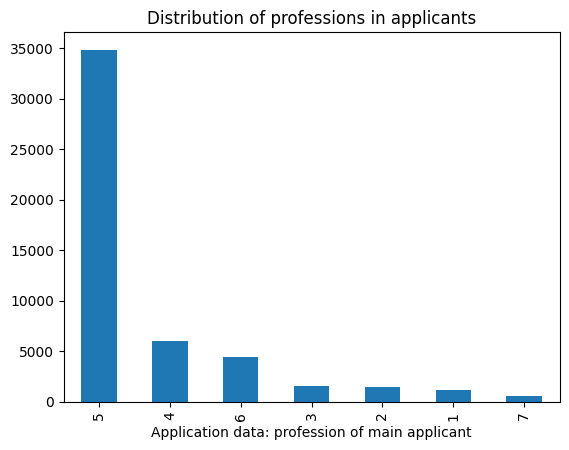

In [17]:
train_data['Application data: profession of main applicant'].value_counts().plot.bar(title="Distribution of professions in applicants")

<AxesSubplot:title={'center':'Distribution of martial statuses in applicants'}, xlabel='Application data: marital status of main applicant'>

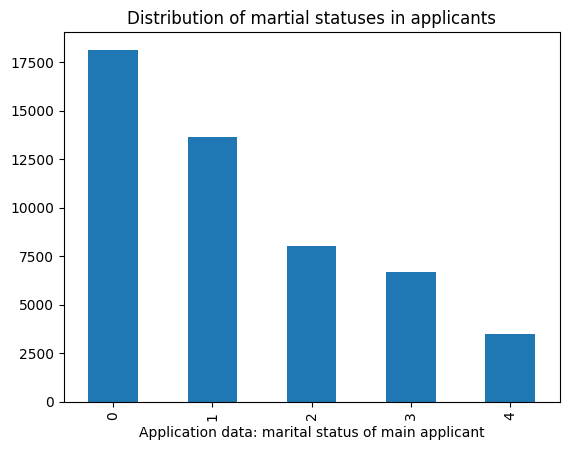

In [18]:
train_data['Application data: marital status of main applicant'].value_counts().plot.bar(title="Distribution of martial statuses in applicants")


<AxesSubplot:title={'center':'Distribution of loan payment frequencies'}, xlabel='Payment frequency'>

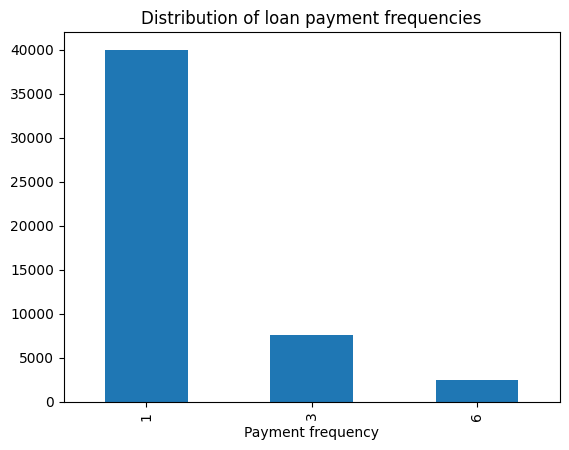

In [19]:
train_data["Payment frequency"].value_counts().plot.bar(title="Distribution of loan payment frequencies")

## Solving NaNs problem

> 1. Application data: income of second applicant - set 0, because there is no second aplicant, so no income
> 2. Application data: profession of second applicant - create new value: 0, it will mean that there is not second applicant, in further one hot encoding it will be clearly seen
> 3. Property ownership for property renovation - add third variant of variable (ex. 2) if loan is not about property renovation. It won't matter since we will OneHotEncode it.
> 4. Value of the goods (car) - set 0 if NaN, there is no car or motorbike so the value is 0. 
> 5. Clasification of the vehicle (Car, Motorbike) - same as with Var18 probably
> 6. Amount on savings account - set 0 if NaN but also add variable 'hasSavingsAccount' that takes 0 if it is NaN and 1 otherwise. It will discriminate amongst people that opened this account but don't have savings and people who don't bother
> 7. target - don't need to do anything. Might be worth looking into: how many of those would get loan according to our model and try to see if in this subsample, distribution is similar. Then we would know if those applicants were really worse than the accepted population(?) Just guessing
> 8. Amount on current account - simple impute by 0. No account? No balance. May be added other variable 'hasCurrentAccount'.
> 9. Loan purpose - simple impute by dominant / drop
> 10. Distribution channel - simple impute by dominant /drop
> 11. Spendings estimation - drop. Giving mean might be tempting, but there are few observations that are missing and we don't want to mess data for the model.

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.base import TransformerMixin, BaseEstimator
# imputer for setting zeros for:
# - Application data: income of second applicant (zero income because no second applicant)
# - Application data: profession of second applicant (other category - doesn't exist)
# - Value of the goods (car) (no car/motorbike, no value)
zero_imputer = SimpleImputer(strategy="constant", fill_value=0)
vars_for_zero_impute = ['Application data: income of second applicant', 'Application data: profession of second applicant', 'Value of the goods (car)']

# imputer for adding categories for:
# - Property ownership for property renovation (add 2 as the other variant, thus no property is being renovated) will be solved by OneHotEncode
# - Classification of the vechicle (Car, Motorbike) (also add 2 if NaN to take variant, that there is no car/motorbike) will be solved by OneHotEncode
add_category_imputer = SimpleImputer(strategy="constant", fill_value=2)
vars_for_add_category_impute = ['Property ownership for property renovation', 'Clasification of the vehicle (Car, Motorbike)']


# imputer with mode for:
# - Loan purpose
# - Distribution channel
mode_imputer = SimpleImputer(strategy="most_frequent")
vars_for_mode_impute = ['Loan purpose', 'Distribution channel']

#imputer that sets zero, but also creates variable that is 0 if this feature is NaN and 1 if not for:
# - Amount on savings account
# - Amount on current account

class SimpleImputeAddFeature(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns # Lista kolumn do transformacji

    def fit(self, X, y=None):
        # W fit nic nie musimy robić, ale musi być obecna
        return self

    def transform(self, X):
        # Tworzymy kopię, aby nie modyfikować oryginalnego DataFrame
        X_copy = X.copy()
        
        for column in self.columns:
            # Dodajemy nową kolumnę z wartościami 0 i 1
            X_copy[column + '_was_missing'] = X_copy[column].isnull().astype(int)
            
            # Simple impute - zamieniamy NaN na 0
            X_copy[column] = X_copy[column].fillna(0)
        
        return X_copy
    
    def get_feature_names_out(self, input_features=None):
       if input_features is None:
           input_features = self.columns
       # Zakładając, że self.columns zawiera cechy, które zostały przetworzone
       output_features = np.concatenate([input_features, [f"{col}_was_missing" for col in self.columns]])
       return output_features



fill_zeros_but_add_var_imputer = SimpleImputeAddFeature(["Amount on current account", "Amount on savings account"])
#fill_zeros_but_add_var.fit_transform(train_data)

vars_for_fill_zeros_but_add_var = ["Amount on current account", "Amount on savings account"]


Making ColumnTransformer for missing features.

In [21]:
from sklearn.compose import ColumnTransformer

impute_column_transformer = ColumnTransformer([
    ("zero_fill", zero_imputer, vars_for_zero_impute),
    ("add_third_category", add_category_imputer, vars_for_add_category_impute),
    ("mode_impute", mode_imputer, vars_for_mode_impute),
    ("fill_zeros_but_add_var", SimpleImputeAddFeature(vars_for_fill_zeros_but_add_var), vars_for_fill_zeros_but_add_var)],
    remainder="passthrough"
)


At this time, the only columns that have missing values are: Spendigs estimation that will be just dropped using .dropna, and target which I do not know what to do xd

In [22]:
transformed_train = impute_column_transformer.fit_transform(train_data)

final = pd.DataFrame(transformed_train, columns=impute_column_transformer.get_feature_names_out())
final.isna().any()

zero_fill__Application data: income of second applicant                    False
zero_fill__Application data: profession of second applicant                False
zero_fill__Value of the goods (car)                                        False
add_third_category__Property ownership for property renovation             False
add_third_category__Clasification of the vehicle (Car, Motorbike)          False
mode_impute__Loan purpose                                                  False
mode_impute__Distribution channel                                          False
fill_zeros_but_add_var__Amount on current account                          False
fill_zeros_but_add_var__Amount on savings account                          False
fill_zeros_but_add_var__Amount on current account_was_missing              False
fill_zeros_but_add_var__Amount on savings account_was_missing              False
remainder__ID                                                              False
remainder__customer_id      

Remove rows where there is NaN in Spendings estimation:

In [23]:
from sklearn.preprocessing import FunctionTransformer

ft_remove_spendings_estimations = FunctionTransformer(lambda df: df[df['remainder__Spendings estimation'].notna()])


## Pipeline w/o NaNs (only target is there)

Final pipeline looks as follows:

In [24]:
def remove_nans(X : pd.DataFrame) -> pd.DataFrame:
    # this function takes raw dataframe data from task and transforms it into df without nans
    
    #fill nas with strategies without dropping rows
    transformed_X = impute_column_transformer.fit_transform(X)
    
    transformed_X_df = pd.DataFrame(transformed_X, columns=impute_column_transformer.get_feature_names_out())
    
    ft_remove_spendings_estimations = FunctionTransformer(lambda df: df[df['remainder__Spendings estimation'].notna()])
    return ft_remove_spendings_estimations.transform(transformed_X_df)
    
remove_nans(train_data)

,zero_fill__Application data: income of second applicant,zero_fill__Application data: profession of second applicant,zero_fill__Value of the goods (car),add_third_category__Property ownership for property renovation,"add_third_category__Clasification of the vehicle (Car, Motorbike)",mode_impute__Loan purpose,mode_impute__Distribution channel,fill_zeros_but_add_var__Amount on current account,fill_zeros_but_add_var__Amount on savings account,fill_zeros_but_add_var__Amount on current account_was_missing,...,remainder__Number of requests during the last 3 months (External data),remainder__Number of requests during the last 6 months (External data),remainder__Number of requests during the last 9 months (External data),remainder__Number of requests during the last 12 months (External data),remainder__Limit on credit card,remainder__Arrear in last 3 months (indicator),remainder__Arrear in last 12 months (indicator),remainder__Credit bureau score (Exterval data),remainder__Average income (Exterval data),remainder___r_
0,0.0,0.0,0.0,1.0,2.0,2.0,1,6768.42,0.0,0.0,...,1,1,1,1,0,0,0,0,3899,0.267045
1,0.0,0.0,11200.0,2.0,1.0,1.0,2,5937.66,3870.6,0.0,...,0,0,0,0,15000,0,0,0,3899,0.53304
2,4300.0,5.0,0.0,2.0,2.0,3.0,1,5647.77,1463.08,0.0,...,1,2,2,2,0,0,0,10,3899,0.861555
3,2500.0,5.0,12400.0,2.0,0.0,1.0,2,3594.9,21563.78,0.0,...,0,0,0,0,0,0,0,10,3899,0.506451
4,0.0,0.0,0.0,1.0,2.0,2.0,1,9908.45,0.0,0.0,...,0,0,2,2,0,0,0,20,3899,0.210913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,11900.0,5.0,52600.0,2.0,0.0,1.0,1,0.0,0.0,1.0,...,1,2,2,2,0,0,0,0,12832,0.783954
49996,0.0,0.0,0.0,1.0,2.0,2.0,1,0.0,0.0,1.0,...,2,2,3,4,0,0,0,0,12832,0.17259
49997,0.0,0.0,79000.0,2.0,1.0,1.0,1,9288.87,255018.31,0.0,...,0,0,0,0,0,0,0,0,12832,0.060722
49998,0.0,0.0,69400.0,2.0,1.0,1.0,Direct,0.0,0.0,1.0,...,2,3,3,3,102000,0,0,10,12832,0.845866


# Features transformation

In this section we will prepare data for machine learning algorithms:
- use strandarization on numerical variables
- use onehot encoding on categorical, nominal variables
- add additional encodings for Distribution_channel variable (some *Direct* and *Online* where not encoded)

In [82]:
transformed_data = remove_nans(train_data)

for column in transformed_data:
    print(column)

zero_fill__Application data: income of second applicant
zero_fill__Application data: profession of second applicant
zero_fill__Value of the goods (car)
add_third_category__Property ownership for property renovation
add_third_category__Clasification of the vehicle (Car, Motorbike)
mode_impute__Loan purpose
mode_impute__Distribution channel
fill_zeros_but_add_var__Amount on current account
fill_zeros_but_add_var__Amount on savings account
fill_zeros_but_add_var__Amount on current account_was_missing
fill_zeros_but_add_var__Amount on savings account_was_missing
remainder__ID
remainder__customer_id
remainder__application_date
remainder__target
remainder__Application_status
remainder__Number of applicants
remainder__Application amount
remainder__Credit duration (months)
remainder__Payment frequency
remainder__Installment amount
remainder__Application data: income of main applicant
remainder__Application data: profession of main applicant
remainder__Application data: employment date (main ap

First let's fix the distribution channel variable

In [79]:
from sklearn.pipeline import make_pipeline
def fix_distribution_channel(X : pd.DataFrame) -> pd.DataFrame:
    X['mode_impute__Distribution channel'] = X['mode_impute__Distribution channel'].replace("Direct", 1)
    X['mode_impute__Distribution channel'] = X['mode_impute__Distribution channel'].replace("Broker", 2)    
    X['mode_impute__Distribution channel'] = X['mode_impute__Distribution channel'].replace("Online", 3)
    return X

def fix_application_status(X : pd.DataFrame) -> pd.DataFrame:
    X['remainder__Application_status'] = X['remainder__Application_status'].replace("Approved", 1)
    X['remainder__Application_status'] = X['remainder__Application_status'].replace("Rejected", 0)
    
    return X

fix_encodings_pipeline = make_pipeline(FunctionTransformer(fix_distribution_channel), FunctionTransformer(fix_application_status))

trainsformed_data = fix_encodings_pipeline.transform(transformed_data)




Also during investigation it came clear that DataFrame is veirdly typed (as object). Since all values are encoded, there should be no problem with chaning the type.

In [84]:
def make_dataframe_numeric_again(X : pd.DataFrame) -> pd.DataFrame:
    X_copy = X.copy()
    for column in X:
        if column.split('__')[1] not in datetime_variables: 
            X[column] = pd.to_numeric(X[column])
    return X_copy

fix_data_pipeline = make_pipeline(fix_encodings_pipeline, FunctionTransformer(make_dataframe_numeric_again))

In [87]:
fixed_data = fix_data_pipeline.transform(transformed_data)

I will build regexes to automate feature selection process (to not bother with transformer names of the features) by
building regexes for selecting columns from previous step based on our lists of features from the beggining.

In [85]:
# lets build numerical feature regex selector
num_regex = "^(.*)("
for num_feature in discrete_variables + continuous_variables:
    num_regex+=num_feature+'|'
num_regex=num_regex[:-1] # removing last |
num_regex+=')$'

#lets build nominal feature regex selector
nominal_regex = "^(.*)("
for cat_feature in categorical_nominal_variables:
        nominal_regex+=cat_feature+'|'
nominal_regex=nominal_regex[:-1]
nominal_regex+=')$'

In [86]:
nominal_regex

'^(.*)(Loan purpose|Distribution channel|Application data: profession of main applicant|Application data: profession of second applicant|Application data: marital status of main applicant)$'

In [48]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector

# standarization
feature_transform_transformer = ColumnTransformer([
    ("scale", StandardScaler(), make_column_selector(num_regex)),
    ("one_hot_encode", OneHotEncoder(), make_column_selector(nominal_regex))
],
    remainder="passthrough")

In [92]:
final_data = feature_transform_transformer.fit_transform(fixed_data)
final_data_df = pd.DataFrame(final_data, columns=feature_transform_transformer.get_feature_names_out())
final_data_df.columns

Index(['scale__zero_fill__Application data: income of second applicant',
       'scale__fill_zeros_but_add_var__Amount on current account',
       'scale__fill_zeros_but_add_var__Amount on savings account',
       'scale__remainder__ID', 'scale__remainder__customer_id',
       'scale__remainder__Number of applicants',
       'scale__remainder__Application amount',
       'scale__remainder__Payment frequency',
       'scale__remainder__Installment amount',
       'scale__remainder__Application data: income of main applicant',
       'scale__remainder__Application data: number of children of main applicant',
       'scale__remainder__Application data: number of dependences of main applicant',
       'scale__remainder__Spendings estimation',
       'scale__remainder__Limit on credit card', 'scale__remainder___r_',
       'one_hot_encode__zero_fill__Application data: profession of second applicant_0.0',
       'one_hot_encode__zero_fill__Application data: profession of second applicant_1.0